## Imports Iniciais

In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [64]:
#Lendo o dataset
df = pd.read_csv('breast_cancer_ap1.csv')

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     561 non-null float64
1     565 non-null float64
2     558 non-null float64
3     564 non-null float64
4     564 non-null float64
5     560 non-null float64
6     561 non-null float64
7     566 non-null float64
8     558 non-null float64
9     566 non-null float64
10    564 non-null float64
11    559 non-null float64
12    564 non-null float64
13    560 non-null float64
14    563 non-null float64
15    566 non-null float64
16    559 non-null float64
17    566 non-null float64
18    560 non-null float64
19    566 non-null float64
20    559 non-null float64
21    566 non-null float64
22    564 non-null float64
23    563 non-null float64
24    560 non-null float64
25    564 non-null float64
26    563 non-null float64
27    562 non-null float64
28    563 non-null float64
29    565 non-null float64
30    561 non-null float64
y     569 non-null int64
dtypes: float64(31), int64(1)
mem

In [66]:
#Verificando valores faltantes 
df.isna().sum()

0      8
1      4
2     11
3      5
4      5
5      9
6      8
7      3
8     11
9      3
10     5
11    10
12     5
13     9
14     6
15     3
16    10
17     3
18     9
19     3
20    10
21     3
22     5
23     6
24     9
25     5
26     6
27     7
28     6
29     4
30     8
y      0
dtype: int64

In [67]:
df['0'].mean()

14.135639928698764

In [68]:
#Preenchendo os valores faltantes
df = df.fillna(df.mean())

In [69]:
df['0'].mean()

14.135639928698764

In [70]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
y     0
dtype: int64

In [71]:
#Separando os dados 
X = df.values[:, :-1]
y = df.values[:, -1]

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
X_train.shape, y_train.shape

((455, 31), (455,))

In [74]:
X_test.shape, y_test.shape

((114, 31), (114,))

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [76]:
#Definição dos métodos Emseble
bcdt = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), oob_score=True, n_jobs=-1)

rfc = RandomForestClassifier(random_state=42)

gbc = GradientBoostingClassifier(random_state=42)

In [77]:
#Definindo os pipelines para a padronização
BCDT = Pipeline([('transformer', StandardScaler()),
                 ('estimator', bcdt)])
RFC = Pipeline([('transformer', StandardScaler()),
                ('estimator', rfc)])
GBC = Pipeline([('transformer', StandardScaler()),
                ('estimator', gbc)])

In [ ]:
#Utilizando GridSearchCV para avaliar as combinações dos hiperparâmetros
gbParam = {'estimator__learning_rate':[0.1, 0.05, 0.01], 'estimator__n_estimators':[50, 100, 200], 
           'estimator__max_depth':[3, 5, 7]}
oParam = {'estimator__n_estimators':[50, 100, 200], 'estimator__max_depth':[3, 5, 7]}
bParam = {'estimator__n_estimators':[50, 100, 200], 'estimator__base_estimator__max_depth':[3, 5, 7]}

BCDT = GridSearchCV(BCDT, bParam, cv=3, scoring=['accuracy', 'precision', 'recall'], iid=True, 
                    return_train_score=True, refit=False)
BCDT.fit(X_train, y_train)

RFC = GridSearchCV(RFC, oParam, cv=3, scoring=['accuracy', 'precision', 'recall'], iid=True, 
                   return_train_score=True, refit=False)
RFC.fit(X_train, y_train)

GBC = GridSearchCV(GBC, gbParam, cv=3, scoring=['accuracy', 'precision', 'recall'], iid=True, 
                   return_train_score=True, refit=False)
GBC.fit(X_train, y_train)

In [ ]:
def resultados(model) :
    df = pd.DataFrame(model.cv_results_)
    
    df_acc = df.nlargest(1, ['mean_test_accuracy'])
    df_precision = df.nlargest(1, ['mean_test_precision'])
    df_recall = df.nlargest(1, ['mean_test_recall'])

    print('Valores das métricas:\nAcurácia - ' + str(df_acc['mean_test_accuracy']) + '\nPrecision - ' + 
          str( df_precision['mean_test_precision']) + '\nRecall - ' + str(df_recall['mean_test_recall']))

In [60]:
resultados(BCDT)

Valores das métricas:
Acurácia - 0    0.995604
Name: mean_test_accuracy, dtype: float64
Precision - 0    0.993076
Name: mean_test_precision, dtype: float64
Recall - 0    1.0
Name: mean_test_recall, dtype: float64


In [61]:
resultados(RFC)

Valores das métricas:
Acurácia - 3    0.995604
Name: mean_test_accuracy, dtype: float64
Precision - 3    0.993076
Name: mean_test_precision, dtype: float64
Recall - 0    1.0
Name: mean_test_recall, dtype: float64


In [62]:
resultados(GBC)

Valores das métricas:
Acurácia - 0    0.993407
Name: mean_test_accuracy, dtype: float64
Precision - 0    0.99304
Name: mean_test_precision, dtype: float64
Recall - 0    0.996497
Name: mean_test_recall, dtype: float64


In [21]:
sc = StandardScaler().fit(X_train)
X_train_scaler = sc.transform(X_train)
X_test_scaler = sc.transform(X_test)

In [22]:
bcdt.fit(X_train_scaler, y_train)
y_pred = bcdt.predict(X_test_scaler)
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

/home/lorien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/lorien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


(1.0, 1.0, 1.0)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mpl = Sequential()
mpl.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
mpl.add(Dense(1, activation='sigmoid'))
mpl.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
mpl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [25]:
historic_epochs = mpl.fit(X_train, y_train, epochs=100, validation_split=.1);

Train on 409 samples, validate on 46 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
409/409 [==============================] - 0s 443us/sample - loss: 4.5686 - acc: 0.4572 - val_loss: 1.5853 - val_acc: 0.4783
Epoch 2/100
409/409 [==============================] - 0s 35us/sample - loss: 2.2760 - acc: 0.5795 - val_loss: 0.5730 - val_acc: 0.7826
Epoch 3/100
409/409 [==============================] - 0s 36us/sample - loss: 1.7743 - acc: 0.5990 - val_loss: 0.9697 - val_acc: 0.6304
Epoch 4/100
409/409 [==============================] - 0s 36us/sample - loss: 1.0303 - acc: 0.7359 - val_loss: 0.5333 - val_acc: 0.7609
Epoch 5/100
409/409 [==============================] - 0s 45us/sample - loss: 1.0158 - acc: 0.7555 - val_loss: 1.0176 - val_acc: 0.8043
Epoch 6/100
409/409 [==============================] - 0s 52us/sample - loss: 1.1618 - acc: 0.7408 - val_loss: 0.4778 - val_acc: 0.8478
Epoch 7/100
409/409 [==============================] - 0s 37us/sample - loss: 0.6803 - acc

409/409 [==============================] - 0s 65us/sample - loss: 0.2999 - acc: 0.8973 - val_loss: 0.4399 - val_acc: 0.8478
Epoch 59/100
409/409 [==============================] - 0s 59us/sample - loss: 0.5250 - acc: 0.8582 - val_loss: 1.4271 - val_acc: 0.8043
Epoch 60/100
409/409 [==============================] - ETA: 0s - loss: 1.9182 - acc: 0.687 - 0s 59us/sample - loss: 0.4512 - acc: 0.8875 - val_loss: 0.5961 - val_acc: 0.8478
Epoch 61/100
409/409 [==============================] - 0s 65us/sample - loss: 0.4865 - acc: 0.8973 - val_loss: 0.3555 - val_acc: 0.9348
Epoch 62/100
409/409 [==============================] - 0s 61us/sample - loss: 0.3218 - acc: 0.9169 - val_loss: 1.6196 - val_acc: 0.8043
Epoch 63/100
409/409 [==============================] - 0s 58us/sample - loss: 0.3015 - acc: 0.9046 - val_loss: 0.3532 - val_acc: 0.8478
Epoch 64/100
409/409 [==============================] - 0s 61us/sample - loss: 0.3124 - acc: 0.9144 - val_loss: 1.4083 - val_acc: 0.6957
Epoch 65/100
409

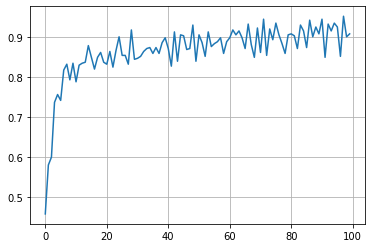

In [29]:
acc = historic_epochs.history['acc']

plt.plot(range(0,100), acc);
plt.grid(True)

In [35]:
print("Época que obteve o melhor desempenho: ")

df_history = pd.DataFrame(historic_epochs.history)

df_history.nlargest(1, ['acc'])

Época que obteve o melhor desempenho: 


,loss,acc,val_loss,val_acc
97,0.133007,0.9511,0.232317,0.913043


In [45]:
mpl.fit(X_train, y_train, epochs=1, callbacks=[historic_epochs]);

455/455 [==============================] - 0s 32us/sample - loss: 0.0261 - acc: 0.9912


In [47]:
mpl.evaluate(X_test, y_test);

114/114 [==============================] - 0s 23us/sample - loss: 0.1032 - acc: 0.9912
